# Determinants of Popular Songs 

# Frederic Barz, Franca Boeglin and Emile Champagne 

# 23/05/2020

## 1. Introduction 

* Today, the amount of songs on platforms such as spotify or apple music is increasing. It seemt that everbody can publich his or her music on those platforms. This raises the question, how we can differentiate popular from unpopular songs. 
* This group project focuses on the hidden determinants of popular songs. This project aims to take on an aggreagate and holistic approach, in order to pin down, which factors that appear to be the most important determining popular songs. 
* The period studies is 2010 unitl 2019 and the number of songs observed is 603. 
* This paper aimts to providing further insight what driving popular songs over time. 
* Structure 

## 1.1 Research Questions

The focus of this group project is on determinants of popular songs. In particular, the paper analyzses which sound characteristics explain the popularity of different songs. The project futher investigates in the dynamics of the factors across time (2010 - 2019). That is, the main focus is a study of multivariate correlations. Also, in order to further assess the relative importance of various factors and their predictive power, prediction analysis is performed in Machine Learning setting. In addition, the project provides an interactive part, which enables the user of this project to interact with the data. Therefore, our group project adresses the following questions: 
 * Which determinants explain the popularity of songs? 
 * Have any dynamics changed over time? 
 * Can Machine Learning be adopted to predict different levels of popularity?

## 2 . Set-Up, Data and Methodology 

### 2.1 Setting-Up: Libraries and Packages 

* **Numpy**: XX
* **Pandas**: The python software package Pandas is used for multiple tasks. The packages provides many series and dataframes. It helps organizing, exploring, representing and manipulating the data. 
* **Matplotlib**: The library Mathplotlib is used to plot 2-dimensionals graphs and plots. It is further used to manipulate different characteristics of plots. 
* **Searborn**: XX

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

First, the function "read_csv" reads the comma-separated-values (csv) file "top10a.csv" into a dataframe using pandas. In addition, the parsing engine python is used to fix parse errors. The engine parameter changes the reading function internally to a slower but more stable method. 

In [24]:
df = pd.read_csv('top10s.csv', engine='python') # Reading the csv file using pandas, set engine paramaeter to python to avoid parse errors. 
print(df) # print dataframe to get a glimpse on the dataset. 

     Unnamed: 0                                              title  \
0             1                                   Hey, Soul Sister   
1             2                               Love The Way You Lie   
2             3                                            TiK ToK   
3             4                                        Bad Romance   
4             5                               Just the Way You Are   
..          ...                                                ...   
598         599                Find U Again (feat. Camila Cabello)   
599         600      Cross Me (feat. Chance the Rapper & PnB Rock)   
600         601  No Brainer (feat. Justin Bieber, Chance the Ra...   
601         602    Nothing Breaks Like a Heart (feat. Miley Cyrus)   
602         603                                   Kills You Slowly   

               artist        top genre  year  bpm  nrgy  dnce  dB  live  val  \
0               Train       neo mellow  2010   97    89    67  -4     8   80   

In [25]:
print(df.shape) # Calculate the number of rows and columns: 15 columns and 603 rows 
df.isna().sum() # looking for missing value, there is no null data for any column 

(603, 15)


Unnamed: 0    0
title         0
artist        0
top genre     0
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
dtype: int64

### 2.2 Data 

The different sound characteristics derive from spotify. First, the different datatypes of dataset are inspected. The output shows that the dataset consists of categorical and numerical data. After the inspection, the different variables used for the analyzes are desrcibed. The different variables derive from Spotify. 

In [26]:
print(df.dtypes) # inspect datatypes 

Unnamed: 0     int64
title         object
artist        object
top genre     object
year           int64
bpm            int64
nrgy           int64
dnce           int64
dB             int64
live           int64
val            int64
dur            int64
acous          int64
spch           int64
pop            int64
dtype: object


#### 2.2.1 Dependen and independent Variables

Before we focus on the different variables in more detail, the following summary of the variables used for the analysis provides an overview: 

* *bmp*: Beats per minute/ Tempo (bmp)
* *nrgy*: Energy 
* *dnce*: Danceability 
* *dB*: Loudness (dB)
* *live*: Liveness 
* *val*: Valence 
* *dur*: Duration (milliseconds)
* *acous*: Acousticness 
* *spch*: Speechiness
* *pop*: Popularity

**Tempo**
Tempo describes the overall estimated tempo of a track. It is measured in beats per minute (bpm). Refering to the muscial terminology, tempo can be defines as the speed or pace of a song. The measurement derives directly from the average beat duration. The histogram below shows that the majority of songs has around 90 to 140 beats per minutes. 

Text(0.5, 1, 'Beats Per Minutes [bpm]')

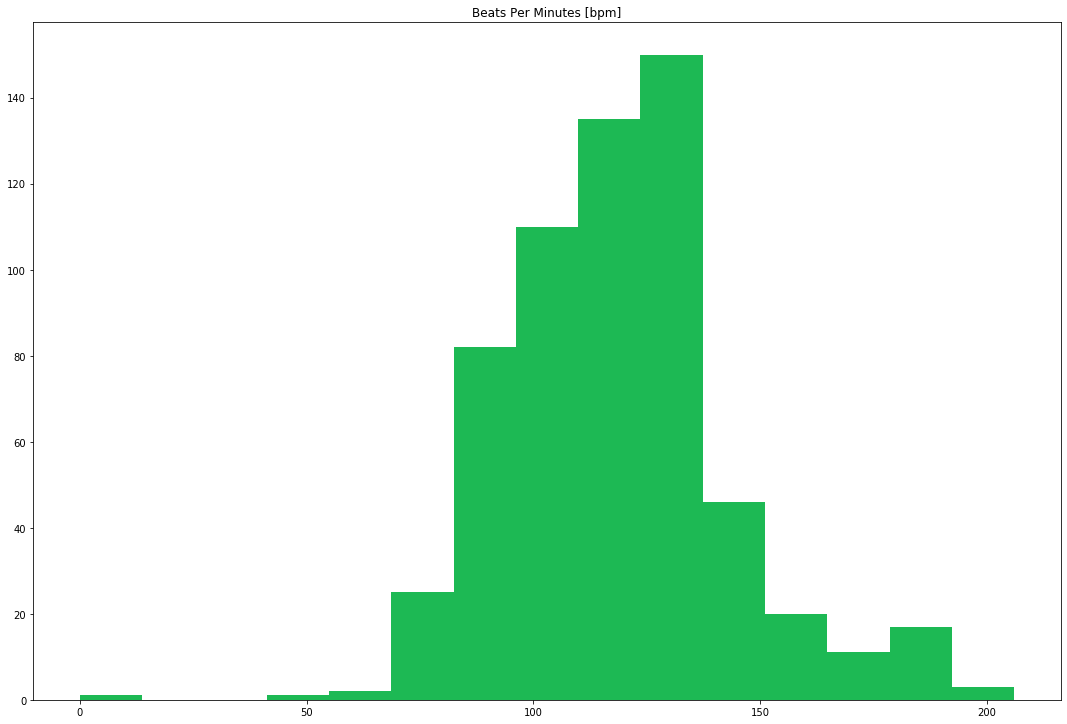

In [27]:
fig, axes = plt.subplots(figsize = (15,10)) # create a figure and one subplot, set the figuresize 
plt.tight_layout() # using tight_layout to automatically adjust plot parameters. 
axes.hist(df["bpm"], bins=15, color = "#1DB954") # Plot beats per minutes, set bin size to 15, set color to spotify green using HEX color.
axes.set_title("Beats Per Minutes [bpm]") #set a title 

**Energy**
Energy measures the perceptual intensity and activity of a song. Energy is measured from a scale from 0.0 to 1.0. Energetic songs are perceived as fast, loud and noisy. The histogram below shows that the majority of tracks in the datasat are rather energetic. 

Text(0.5, 1, 'Energy')

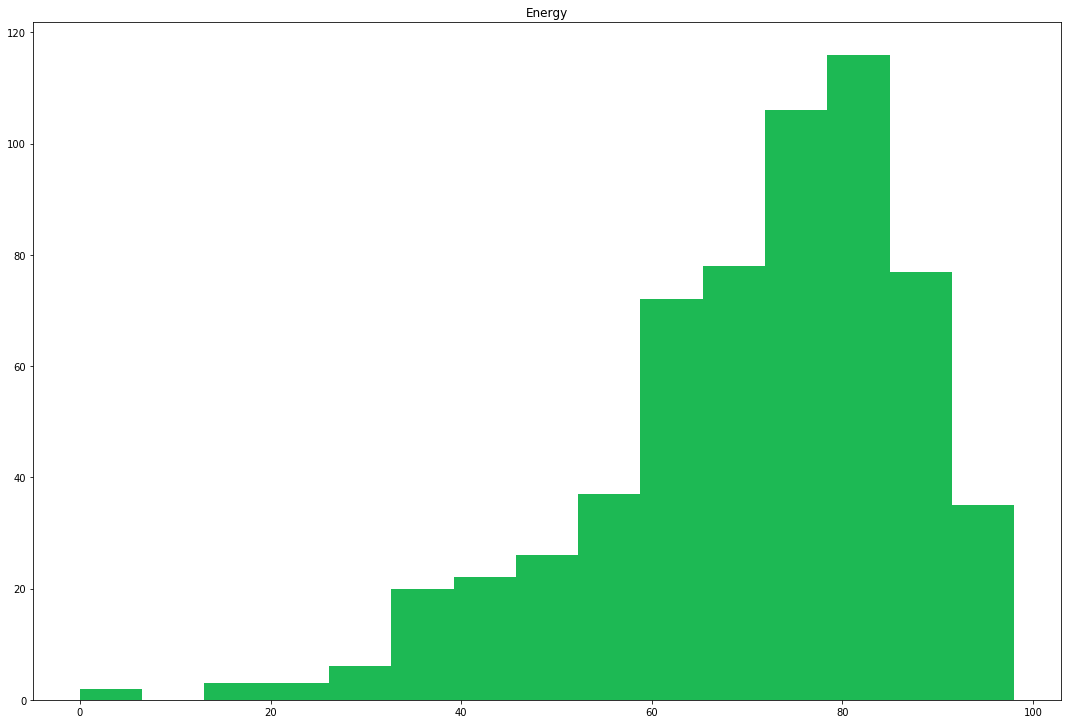

In [28]:
fig, axes = plt.subplots(figsize = (15,10)) # create a figure and one subplot, set the figuresize 
plt.tight_layout() # using tight_layout to automatically adjust plot parameters. 
axes.hist(df["nrgy"], bins=15, color = "#1DB954") # Plot energy, set bin size to 15, set color to spotify green using HEX color.
axes.set_title("Energy") #set a title 

**Danceability** 
Based on a combination of musical characteristics, danceability describes how suitable a songs is for dancing. Therefore danceablity consists of elements such as tempo, rythm, stability, beat strength and overall regularity. Danceability is measured on a scale from 0.0 to 1.0, whereas 0.0 is least danceable and 1.0 is most danceable. As the plot shows, the majority of tracks in the dataset are suitable for dancing dnce (> .60). 

Text(0.5, 1, 'Danceablity')

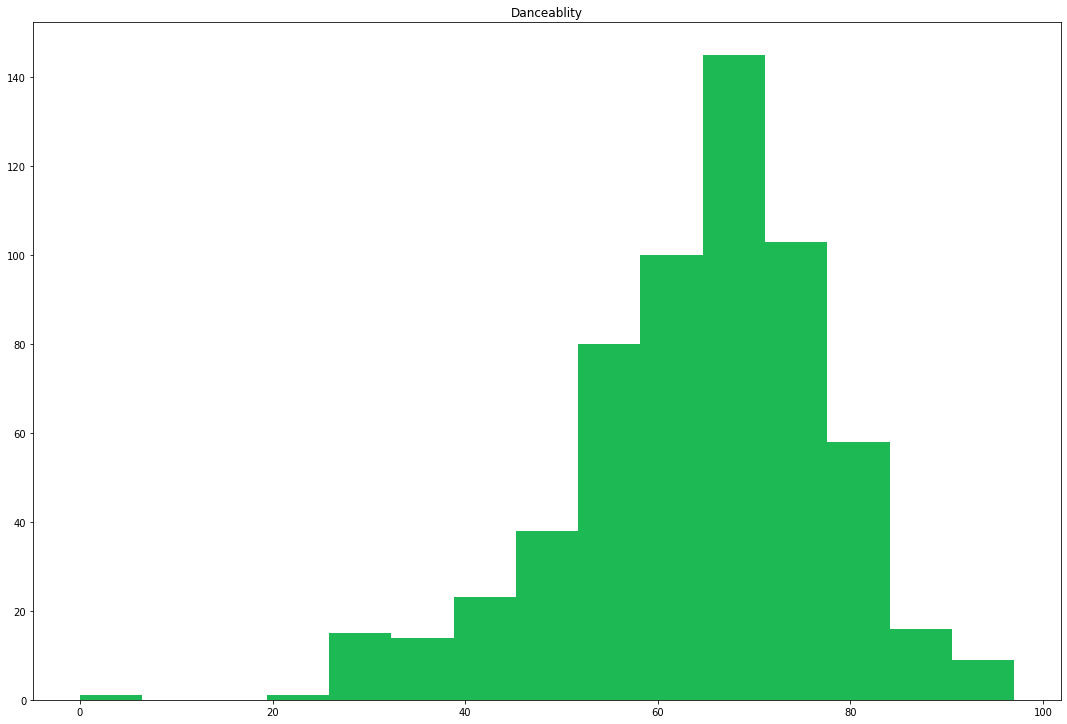

In [29]:
fig, axes = plt.subplots(figsize = (15,10)) # create a figure and one subplot, set the figuresize 
plt.tight_layout() # using tight_layout to automatically adjust plot parameters. 
axes.hist(df["dnce"], bins=15, color = "#1DB954") # Plot danceablity, set bin size to 15, set color to spotify green using HEX color.
axes.set_title("Danceablity") #set a title 

**Loudness** 
Loudness measures by definition how loud a specfic song is. It is measured in decibels (dB). The loudness of a track represents all values averaged across the entire song. It further represents the quality of a song that is the primary psychological correlate of amplitude in deciple. Typically, values range from -60 to 0. As can be seen in the histogram below, the majority of tracks have an average loudness close between -10 and 0. This means that the dataset contains mainly lound songs.   

Text(0.5, 1, 'Loudness')

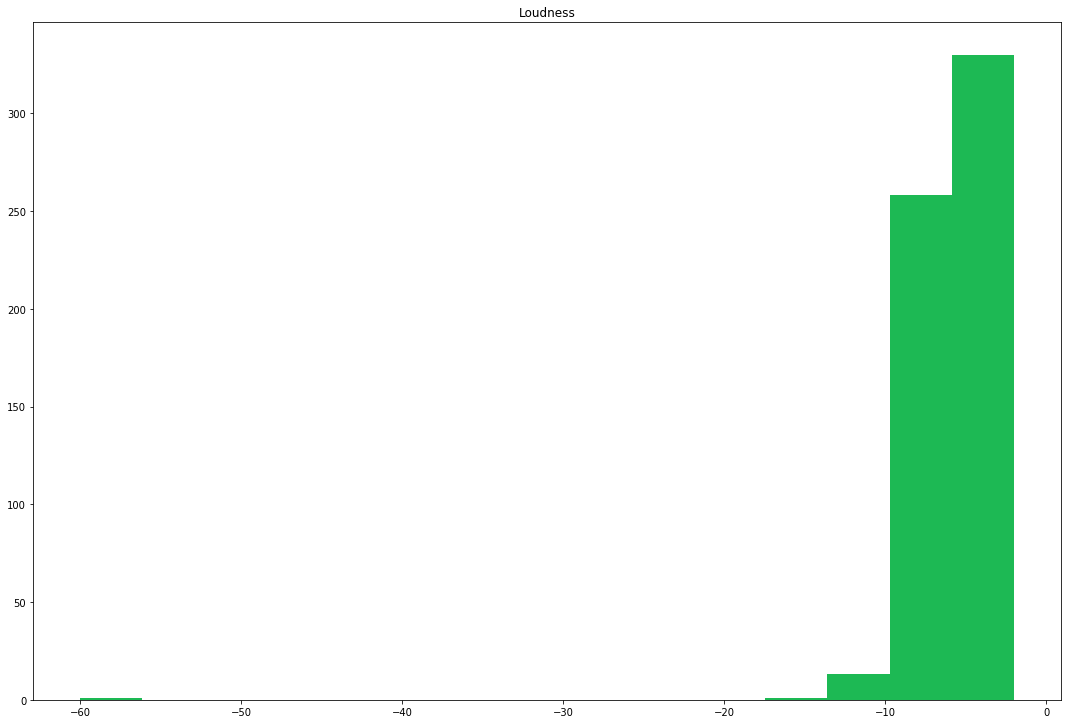

In [30]:
fig, axes = plt.subplots(figsize = (15,10)) # create a figure and one subplot, set the figuresize 
plt.tight_layout() # using tight_layout to automatically adjust plot parameters. 
axes.hist(df["dB"], bins=15, color = "#1DB954") # Plot loudness, set bin size to 15, set color to spotify green using HEX color.
axes.set_title("Loudness") #set a title 

**Liveness** 
Liveness measures the propensity of live audience in the track. The higher the value for liveness, the higher the probability that the track was performed live. A value above 0.8 typcially means that a given track was performed live. As can be seen below, the majority of tracks in the dataset is not peformed live. 

Text(0.5, 1, 'Liveness')

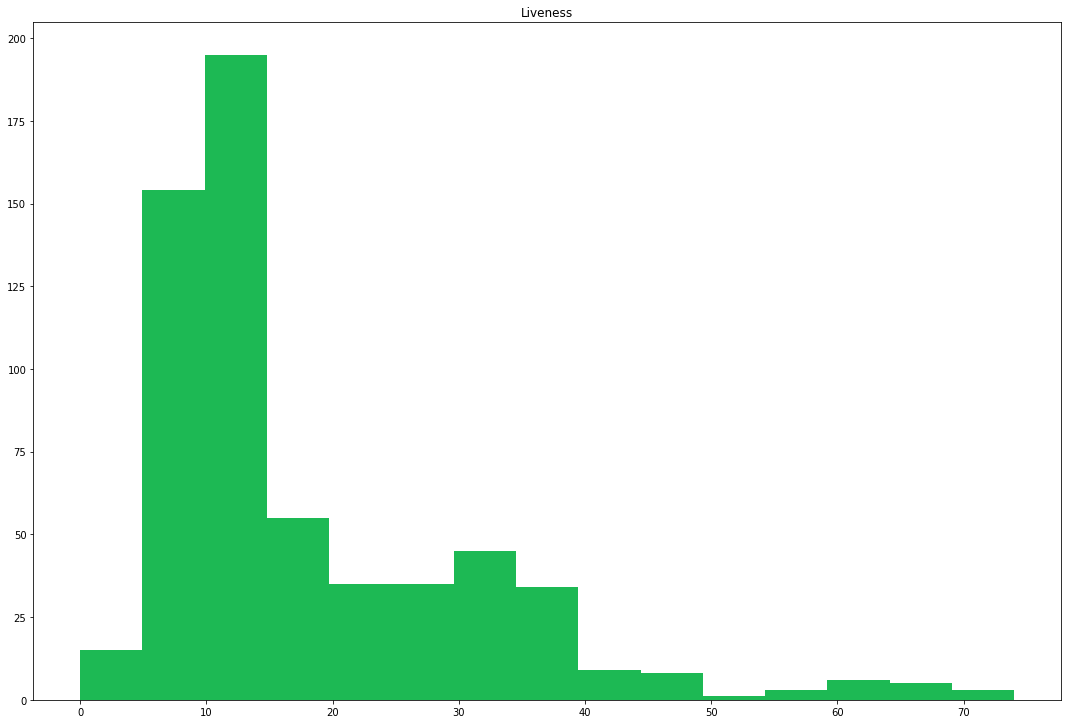

In [31]:
fig, axes = plt.subplots(figsize = (15,10)) # create a figure and one subplot, set the figuresize 
plt.tight_layout() # using tight_layout to automatically adjust plot parameters. 
axes.hist(df["live"], bins=15, color = "#1DB954") # Plot liveness, set bin size to 15, set color to spotify green using HEX color.
axes.set_title("Liveness") #set a title 

**Valence**
Valence describes the musical positiveness of a track. Valence is measured on a scale from 0.0 to 1.0. High valence sounds more positive, whereas low valence sounds more negative. A positive tracks sounds happy, cheerful, euphoric etc. and a negativ track has more sad, depressed or angry sound characteristics. The plot shows that the songs in the dataset cover the whole spectrum of valence. The majority of songs is approximately in the middle. 

Text(0.5, 1, 'Valence')

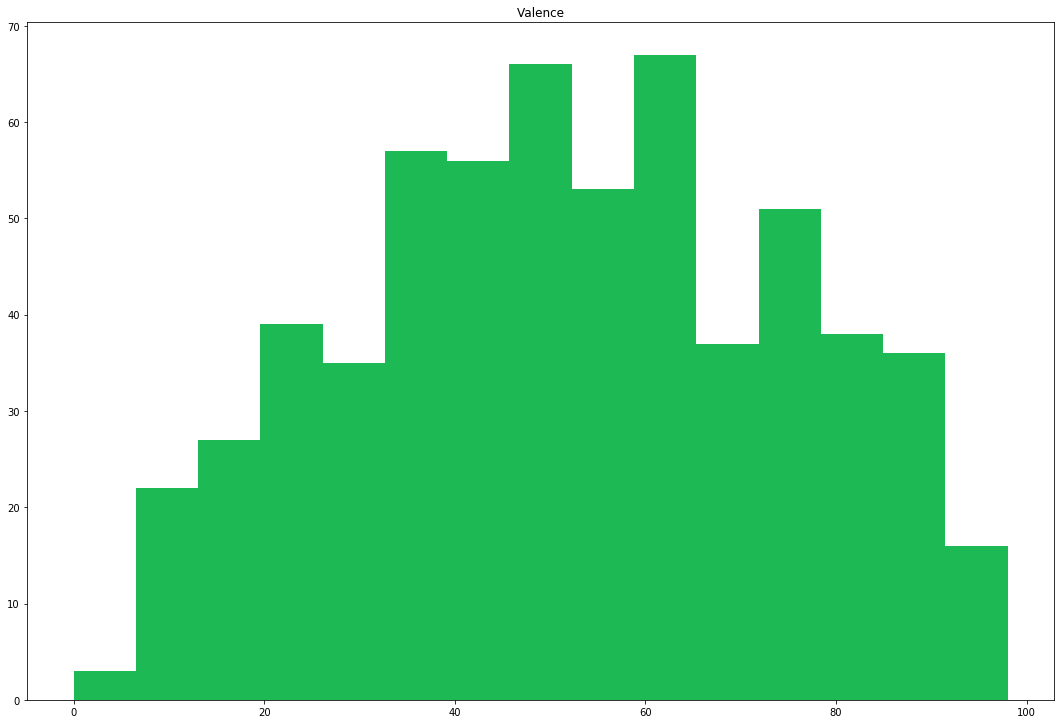

In [32]:
fig, axes = plt.subplots(figsize = (15,10)) # create a figure and one subplot, set the figuresize 
plt.tight_layout() # using tight_layout to automatically adjust plot parameters. 
axes.hist(df["val"], bins=15, color = "#1DB954") # Plot liveness, set bin size to 15, set color to spotify green using HEX color.
axes.set_title("Valence") #set a title 

**Duration** 
Duration represents the length of the song and is measured in milliseconds. The histogram shows that songs are usually between 150 and 300 seconds long. The average track is approximately 223 seconds long. 

Text(0.5, 1, 'Duration')

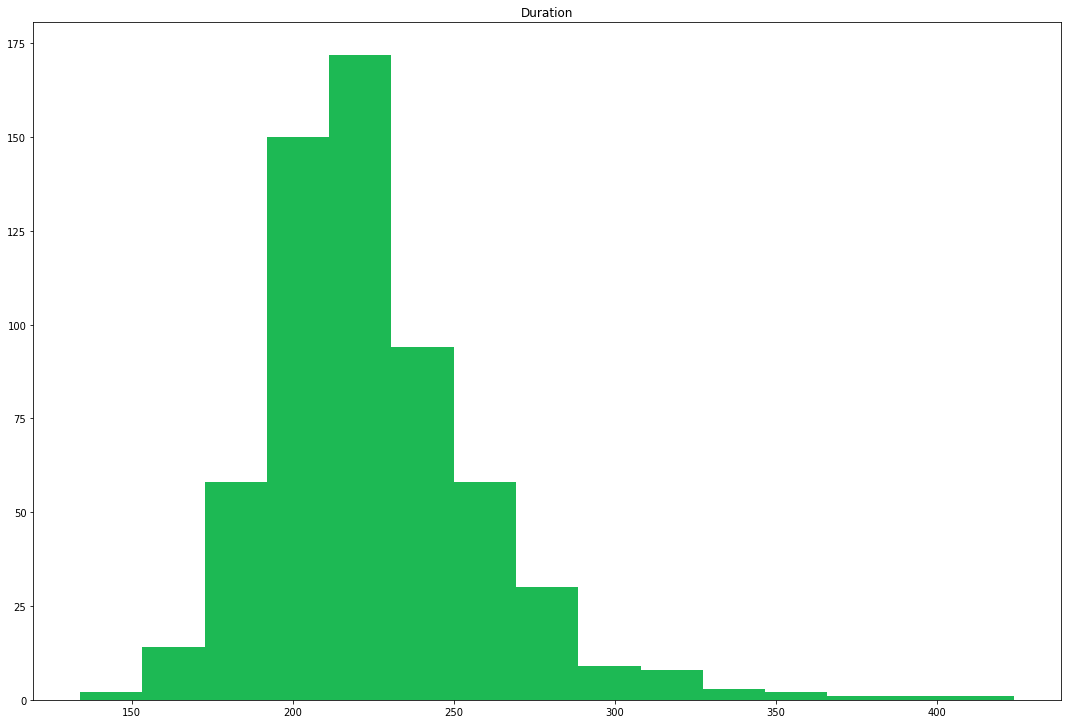

In [33]:
fig, axes = plt.subplots(figsize = (15,10)) # create a figure and one subplot, set the figuresize 
plt.tight_layout() # using tight_layout to automatically adjust plot parameters. 
axes.hist(df["dur"], bins=15, color = "#1DB954") # Plot liveness, set bin size to 15, set color to spotify green using HEX color.
axes.set_title("Duration") #set a title 

**Acousticness**
Acousticness measures by definition how acoustic a track is. Acousticness is measured on a scale from 0.0 to 1.0. The histogram below shows that the majority of the tracks in the dataset do not have a lot of acoustic elements. 

Text(0.5, 1, 'Acousticness')

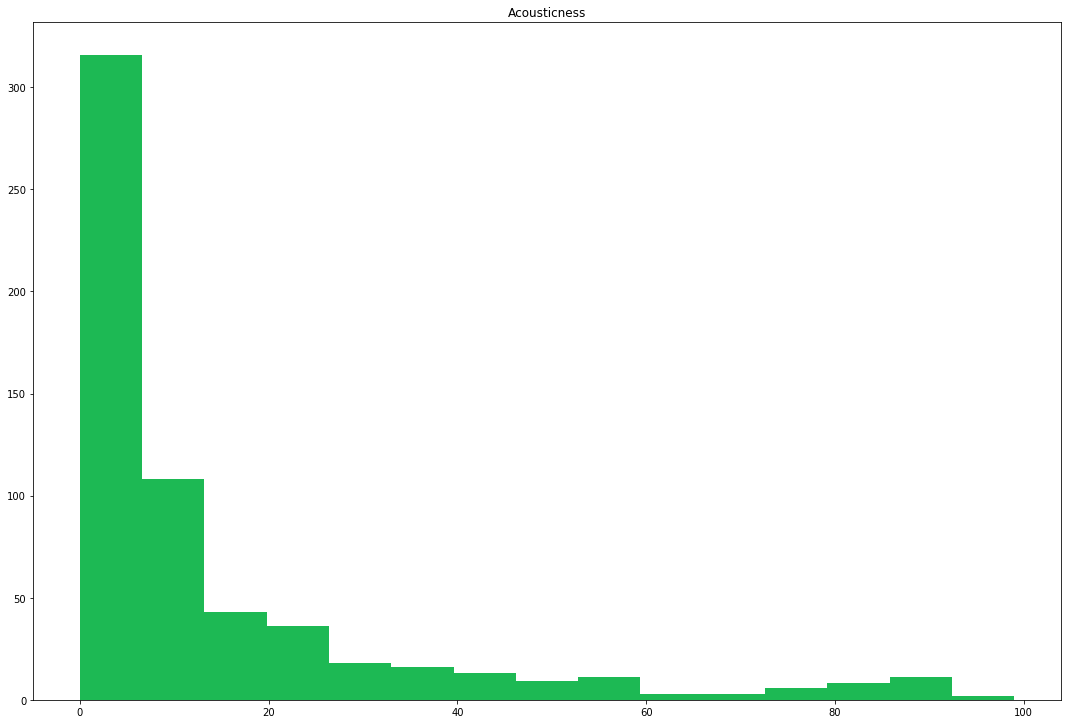

In [34]:
fig, axes = plt.subplots(figsize = (15,10)) # create a figure and one subplot, set the figuresize 
plt.tight_layout() # using tight_layout to automatically adjust plot parameters. 
axes.hist(df["acous"], bins=15, color = "#1DB954") # Plot liveness, set bin size to 15, set color to spotify green using HEX color.
axes.set_title("Acousticness") #set a title 

**Speechiness**
Speechiness represents the presence of spocen words in a track. Speechiness is measured on a scale from 0.0 to 1.0. A value of 1.0 is achieved, if there are many spoken words in a track (e.g. podcast). Typically, values above 0.66 result from tracks which are probably entirely of spoken words. Values between 0.33 and 0.66 are tracks which contain music as well as spoken words (e.g. rap songs). Values below 0.33 do not include any spoken words. The histogram clarifies that the dataset consists mostly of songs. 

Text(0.5, 1, 'Speechiness')

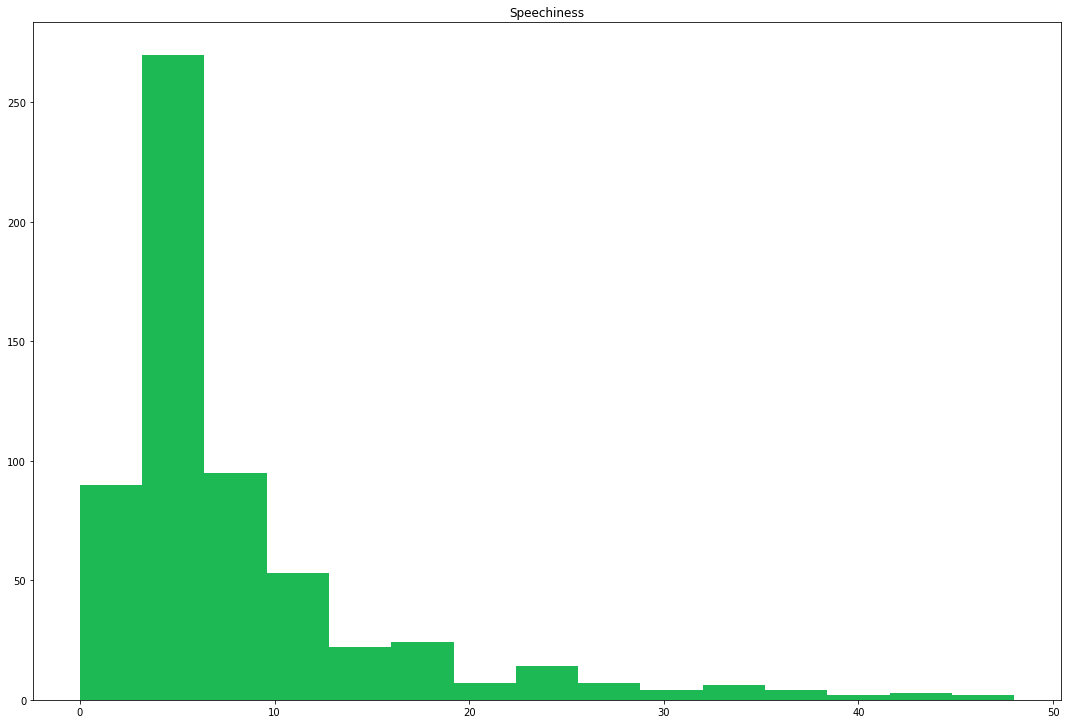

In [35]:
fig, axes = plt.subplots(figsize = (15,10)) # create a figure and one subplot, set the figuresize 
plt.tight_layout() # using tight_layout to automatically adjust plot parameters. 
axes.hist(df["spch"], bins=15, color = "#1DB954") # Plot liveness, set bin size to 15, set color to spotify green using HEX color.
axes.set_title("Speechiness") #set a title 

**Popularity** 
The last variable measures the popularity of the song. The higher the value the more popular was the song. This variable is treated as the dependent varible in the following analysis. As can be seen, most of the songs were quite popular. 

Text(0.5, 1, 'Popularity')

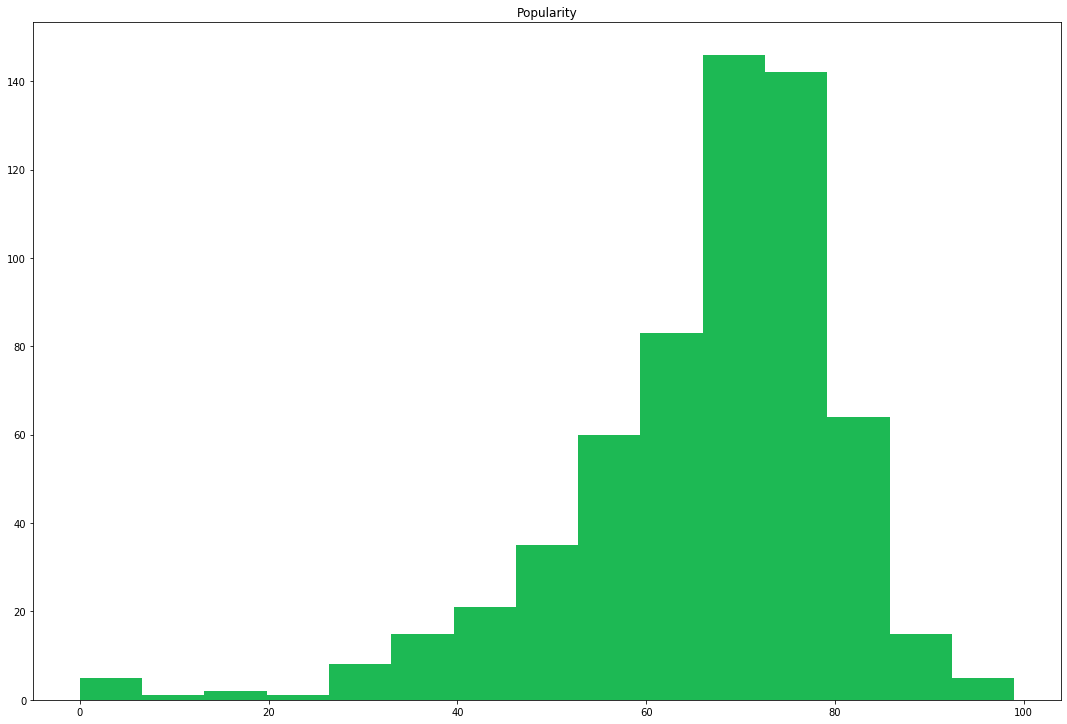

In [36]:
fig, axes = plt.subplots(figsize = (15,10)) # create a figure and one subplot, set the figuresize 
plt.tight_layout() # using tight_layout to automatically adjust plot parameters. 
axes.hist(df["pop"], bins=15, color = "#1DB954") # Plot liveness, set bin size to 15, set color to spotify green using HEX color.
axes.set_title("Popularity") #set a title 

In [37]:
df.describe()

,Unnamed: 0,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,302.000000,2014.592040,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730
std,174.215384,2.607057,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746
min,1.000000,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,151.500000,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,302.000000,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,452.500000,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000
max,603.000000,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


**Check correlation between dataset's features**


In [38]:
df.corr() # correlation matrix 

,Unnamed: 0,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Unnamed: 0,1.000000,0.989031,-0.114849,-0.214586,0.074920,-0.133914,-0.129865,-0.129002,-0.210783,0.096518,0.013672,0.150420
year,0.989031,1.000000,-0.104247,-0.225596,0.079269,-0.126471,-0.136331,-0.122025,-0.215344,0.101725,0.004778,0.241261
bpm,-0.114849,-0.104247,1.000000,0.126170,-0.131301,0.183870,0.081579,0.016021,-0.029359,-0.113257,0.058999,0.018983
nrgy,-0.214586,-0.225596,0.126170,1.000000,0.167209,0.537528,0.186738,0.409577,-0.143610,-0.562287,0.107313,-0.057645
dnce,0.074920,0.079269,-0.131301,0.167209,1.000000,0.233170,-0.028801,0.501696,-0.176841,-0.240064,-0.028041,0.116054
dB,-0.133914,-0.126471,0.183870,0.537528,0.233170,1.000000,0.081934,0.282922,-0.104723,-0.190401,-0.001110,0.156897
live,-0.129865,-0.136331,0.081579,0.186738,-0.028801,0.081934,1.000000,0.020226,0.098339,-0.098167,0.144103,-0.075749
val,-0.129002,-0.122025,0.016021,0.409577,0.501696,0.282922,0.020226,1.000000,-0.262256,-0.249038,0.122013,0.038953
dur,-0.210783,-0.215344,-0.029359,-0.143610,-0.176841,-0.104723,0.098339,-0.262256,1.000000,0.091802,0.054564,-0.104363
acous,0.096518,0.101725,-0.113257,-0.562287,-0.240064,-0.190401,-0.098167,-0.249038,0.091802,1.000000,0.002763,0.026704


## 3. Results 

### 3.1 Descriptive Analytics 

* Describing the different variables and make some visualizations 
* Showing some correlations between the variables 
* Ideas: Popularity over the year 
* Scatterplots between IV and DV
* Showing some interactive stuff 

**Correlation between the different variables in the dataset**
First, we want to have a look on the correlation matrix to identify pair of variables that correlate with each other. Colourcoding helps to identfy these pairs easily. 

In [39]:
import seaborn as sn 

Text(0.5, 1, 'Correlation between variables')

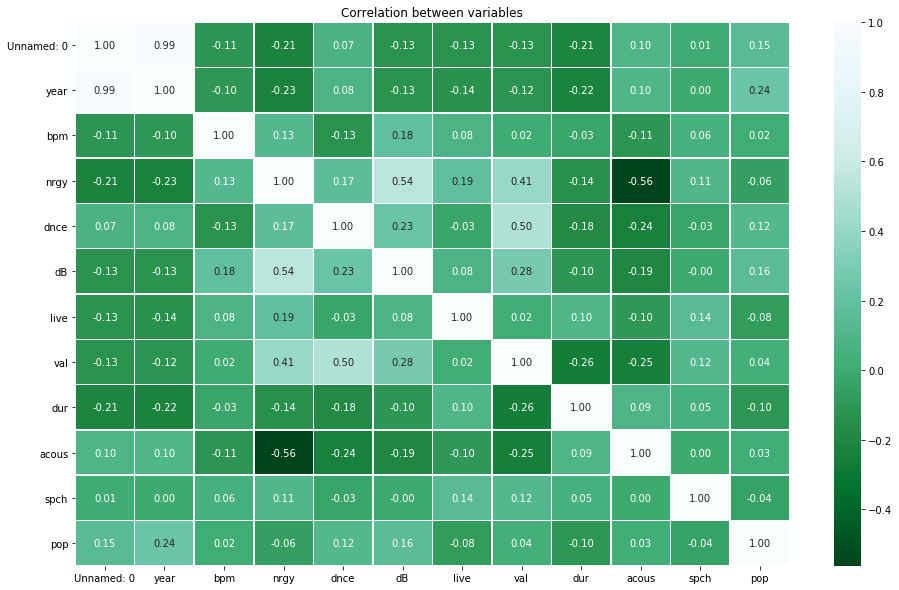

In [40]:
plt.figure(figsize=(16,10)) # plotting a figure and setting the size of the figure 
sn.heatmap(df.corr(), # define the figer format, heatmap based on correlations between variables 
           annot = True, # annot to write the values in the cell 
           fmt = ".2f", # changing format so we get two decimal points
           cmap = "BuGn_r", # mapping from data value to color space  (colourcoding)
           linewidths=.5) # adding a line between each sells for better visual interpretation 
plt.title("Correlation between variables") # setting a title 

**Correlation between variables**

Text(0.5, 1.0, 'Scatterplot: Beats per Minutes and Popularity')

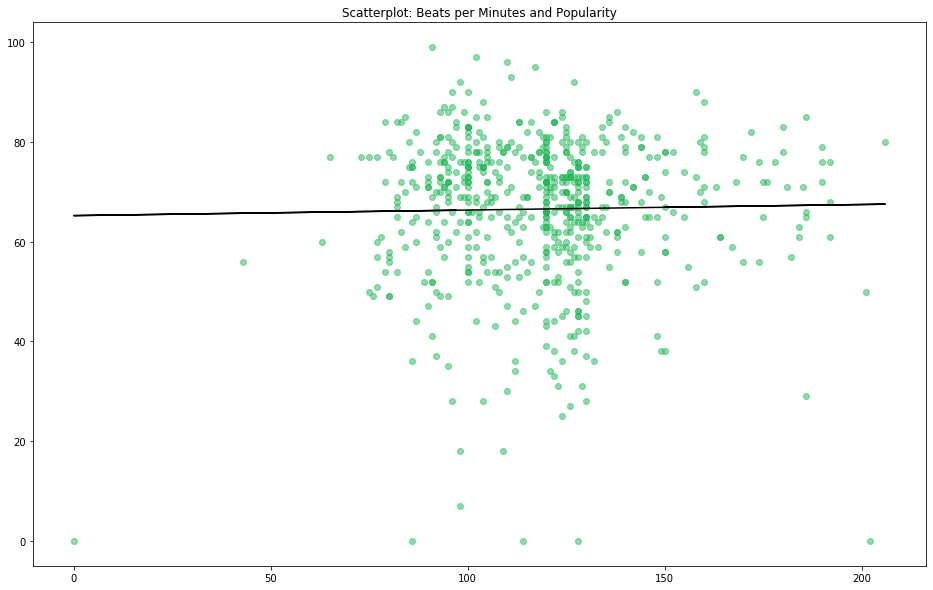

In [56]:
x = df["bpm"]
y = df["pop"]
m, b = np.polyfit(x, y, 1) # m = slope, b = intercept, using numpy to create a fitting line 

fig, axes = plt.subplots(figsize = (16,10)) # create a figure and one subplot and set the size 
plt.plot(x, y, 
        "o", # scatterplot 
        alpha = 0.5, # define size of points 
        color = "#1DB954") # define color 
plt.plot(x, m*x + b, color = "black") # plot the fitting line 
plt.title("Scatterplot: Beats per Minutes and Popularity") # set the title 

The plot shows that between beats per minute and popularity is only a small positive correlation. 

Text(0.5, 1.0, 'Scatterplot: Energy and Popularity')

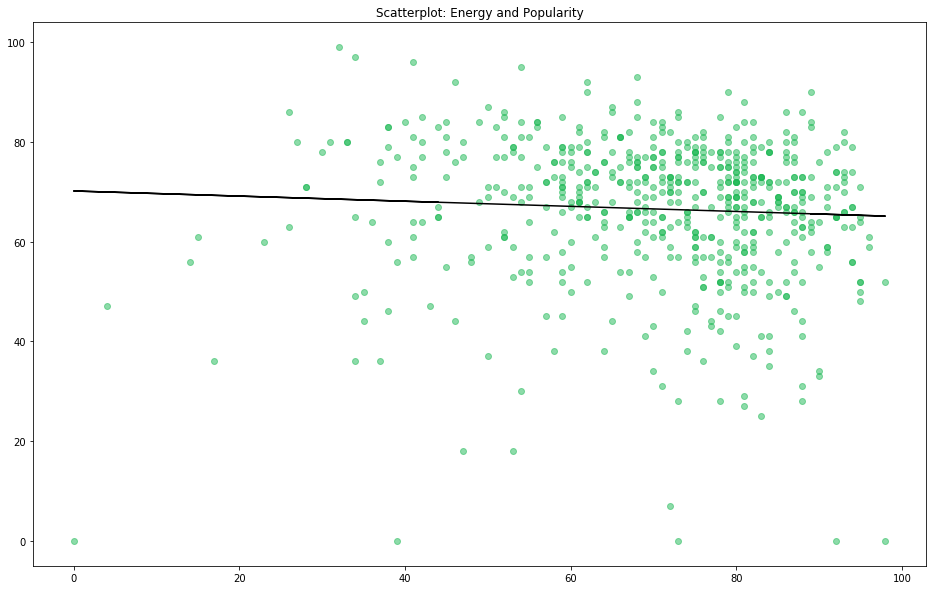

In [59]:
x = df["nrgy"]
y = df["pop"]
m, b = np.polyfit(x, y, 1) # m = slope, b = intercept, using numpy to create a fitting line 

fig, axes = plt.subplots(figsize = (16,10)) # create a figure and one subplot and set the size 
plt.plot(x, y, 
        "o", # scatterplot 
        alpha = 0.5, # define size of points 
        color = "#1DB954") # define color 
plt.plot(x, m*x + b, color = "black") # plot the fitting line 
plt.title("Scatterplot: Energy and Popularity") # set the title 

The plot shows that between Energy and Popularity is a small negative correlation. 

Text(0.5, 1.0, 'Scatterplot: Danceability and Popularity')

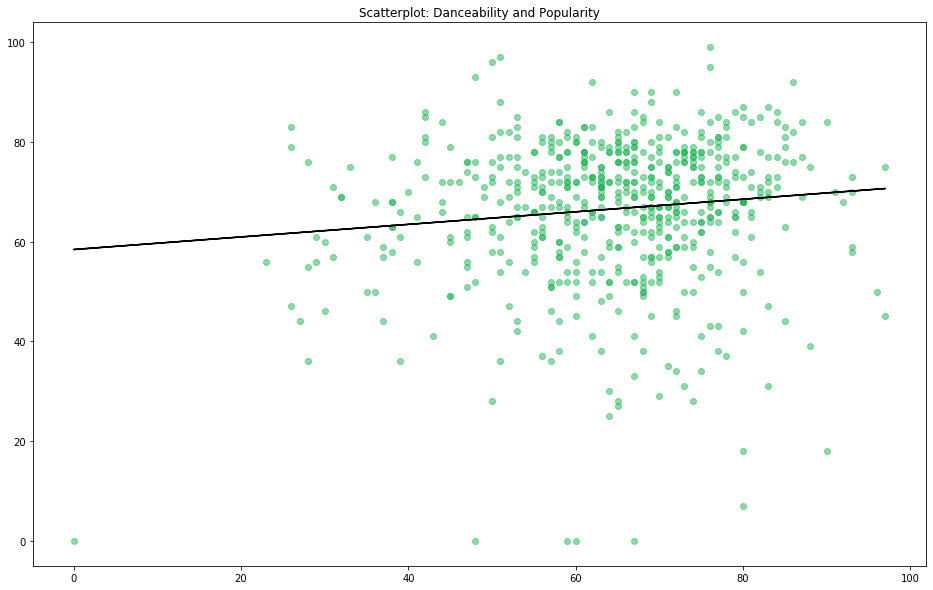

In [60]:
x = df["dnce"]
y = df["pop"]
m, b = np.polyfit(x, y, 1) # m = slope, b = intercept, using numpy to create a fitting line 

fig, axes = plt.subplots(figsize = (16,10)) # create a figure and one subplot and set the size 
plt.plot(x, y, 
        "o", # scatterplot 
        alpha = 0.5, # define size of points 
        color = "#1DB954") # define color 
plt.plot(x, m*x + b, color = "black") # plot the fitting line 
plt.title("Scatterplot: Danceability and Popularity") # set the title 

Text(0.5, 1.0, 'Scatterplot: Beats per Minutes and Popularity')

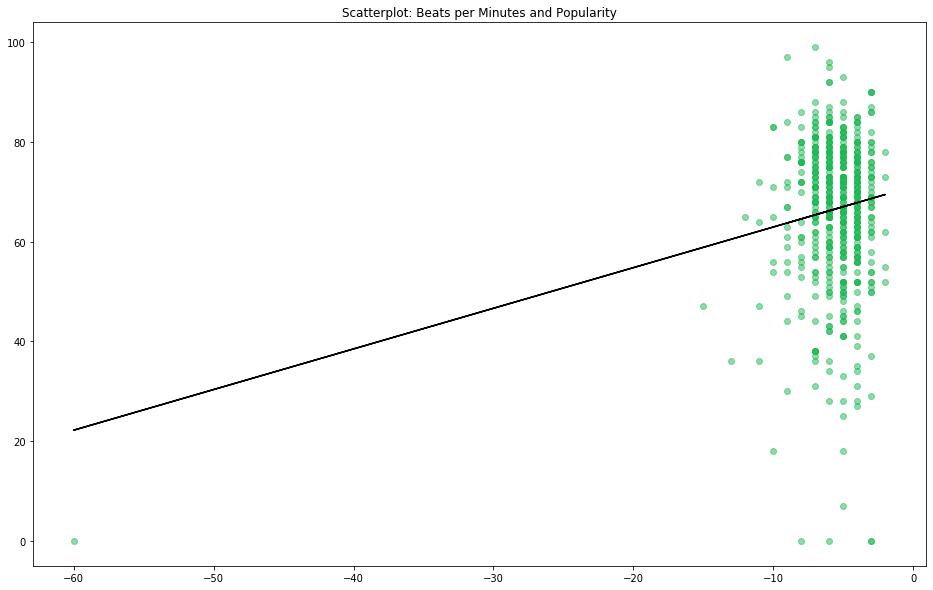

In [62]:
x = df["dB"]
y = df["pop"]
m, b = np.polyfit(x, y, 1) # m = slope, b = intercept, using numpy to create a fitting line 

fig, axes = plt.subplots(figsize = (16,10)) # create a figure and one subplot and set the size 
plt.plot(x, y, 
        "o", # scatterplot 
        alpha = 0.5, # define size of points 
        color = "#1DB954") # define color 
plt.plot(x, m*x + b, color = "black") # plot the fitting line 
plt.title("Scatterplot: Loudness and Popularity") # set the title 

The plot shows that there is an outliers which determines the slope of the fitting line. 

Text(0.5, 1.0, 'Scatterplot: Liveness and Popularity')

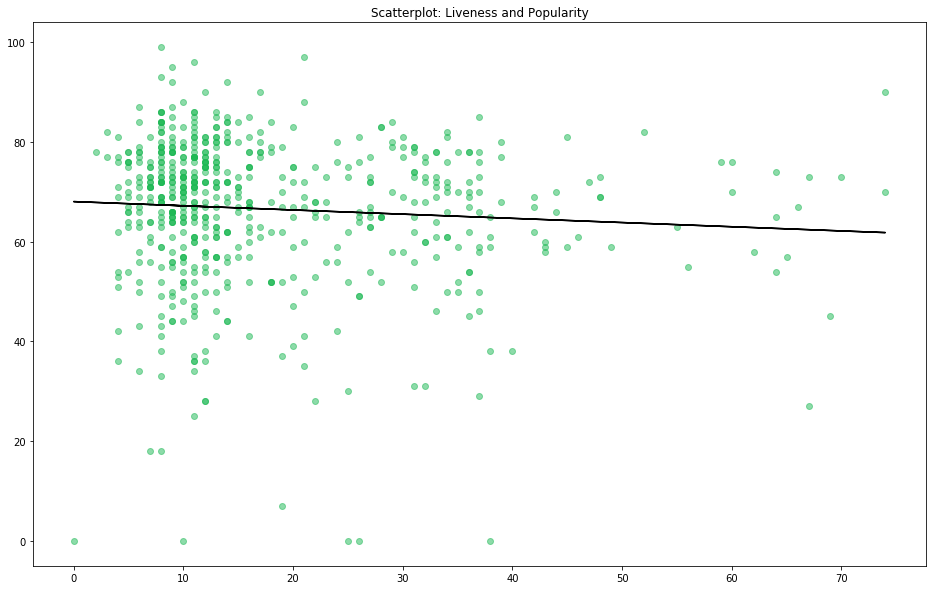

In [63]:
x = df["live"]
y = df["pop"]
m, b = np.polyfit(x, y, 1) # m = slope, b = intercept, using numpy to create a fitting line 

fig, axes = plt.subplots(figsize = (16,10)) # create a figure and one subplot and set the size 
plt.plot(x, y, 
        "o", # scatterplot 
        alpha = 0.5, # define size of points 
        color = "#1DB954") # define color 
plt.plot(x, m*x + b, color = "black") # plot the fitting line 
plt.title("Scatterplot: Liveness and Popularity") # set the title 

There is a small negative correlation between liveness and popularity. 

Text(0.5, 1.0, 'Scatterplot: Valence and Popularity')

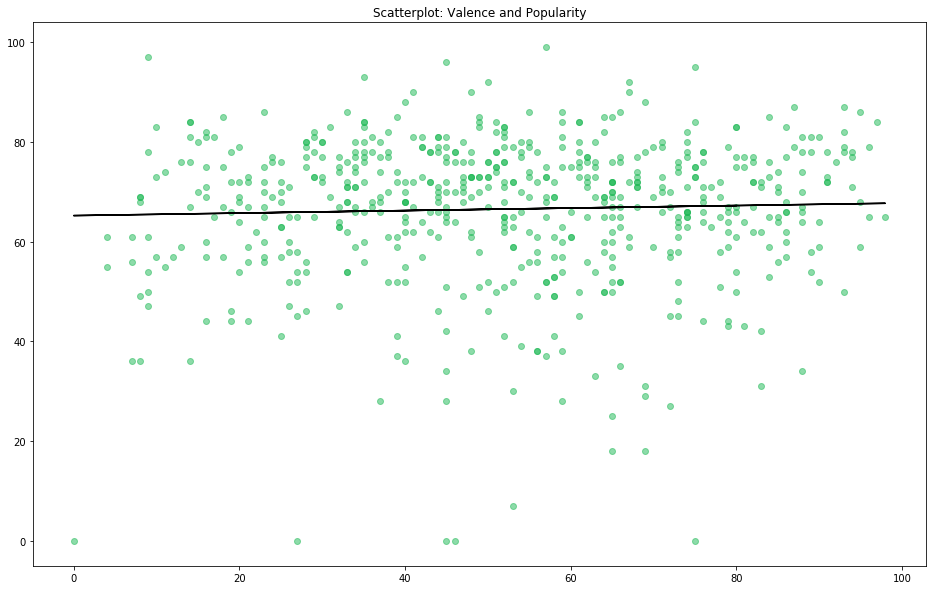

In [64]:
x = df["val"]
y = df["pop"]
m, b = np.polyfit(x, y, 1) # m = slope, b = intercept, using numpy to create a fitting line 

fig, axes = plt.subplots(figsize = (16,10)) # create a figure and one subplot and set the size 
plt.plot(x, y, 
        "o", # scatterplot 
        alpha = 0.5, # define size of points 
        color = "#1DB954") # define color 
plt.plot(x, m*x + b, color = "black") # plot the fitting line 
plt.title("Scatterplot: Valence and Popularity") # set the title 

There is no clear correlation between valence and popularity. 

Text(0.5, 1.0, 'Scatterplot: Durability and Popularity')

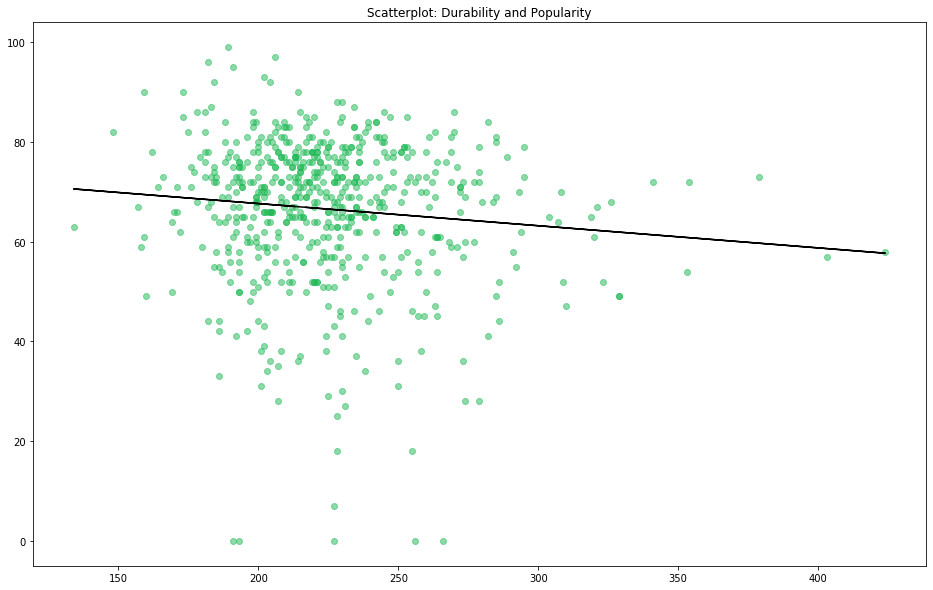

In [65]:
x = df["dur"]
y = df["pop"]
m, b = np.polyfit(x, y, 1) # m = slope, b = intercept, using numpy to create a fitting line 

fig, axes = plt.subplots(figsize = (16,10)) # create a figure and one subplot and set the size 
plt.plot(x, y, 
        "o", # scatterplot 
        alpha = 0.5, # define size of points 
        color = "#1DB954") # define color 
plt.plot(x, m*x + b, color = "black") # plot the fitting line 
plt.title("Scatterplot: Durability and Popularity") # set the title 

There is a negative correlation between durability and popularity. 

Text(0.5, 1.0, 'Scatterplot: Accousticness and Popularity')

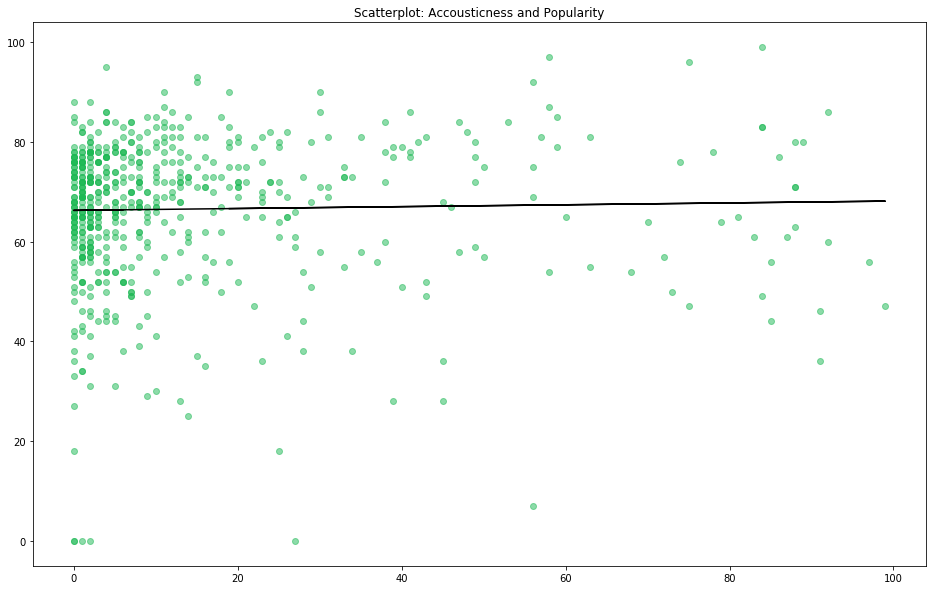

In [66]:
x = df["acous"]
y = df["pop"]
m, b = np.polyfit(x, y, 1) # m = slope, b = intercept, using numpy to create a fitting line 

fig, axes = plt.subplots(figsize = (16,10)) # create a figure and one subplot and set the size 
plt.plot(x, y, 
        "o", # scatterplot 
        alpha = 0.5, # define size of points 
        color = "#1DB954") # define color 
plt.plot(x, m*x + b, color = "black") # plot the fitting line 
plt.title("Scatterplot: Accousticness and Popularity") # set the title 

There is no clear correltion between Accousticness and Popularity. 

Text(0.5, 1.0, 'Scatterplot: Speechiness and Popularity')

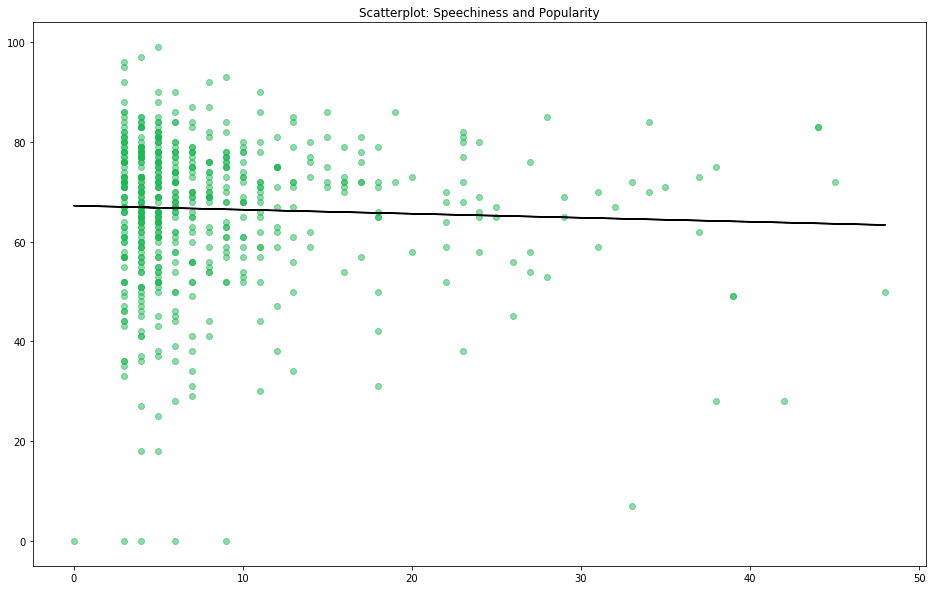

In [67]:
x = df["spch"]
y = df["pop"]
m, b = np.polyfit(x, y, 1) # m = slope, b = intercept, using numpy to create a fitting line 

fig, axes = plt.subplots(figsize = (16,10)) # create a figure and one subplot and set the size 
plt.plot(x, y, 
        "o", # scatterplot 
        alpha = 0.5, # define size of points 
        color = "#1DB954") # define color 
plt.plot(x, m*x + b, color = "black") # plot the fitting line 
plt.title("Scatterplot: Speechiness and Popularity") # set the title 

There is a small negative correlation between speechiness and popularity. 

## Univariate Analysis  
Since there are no clear patterns between each pair of variable have a look on specific variables. 

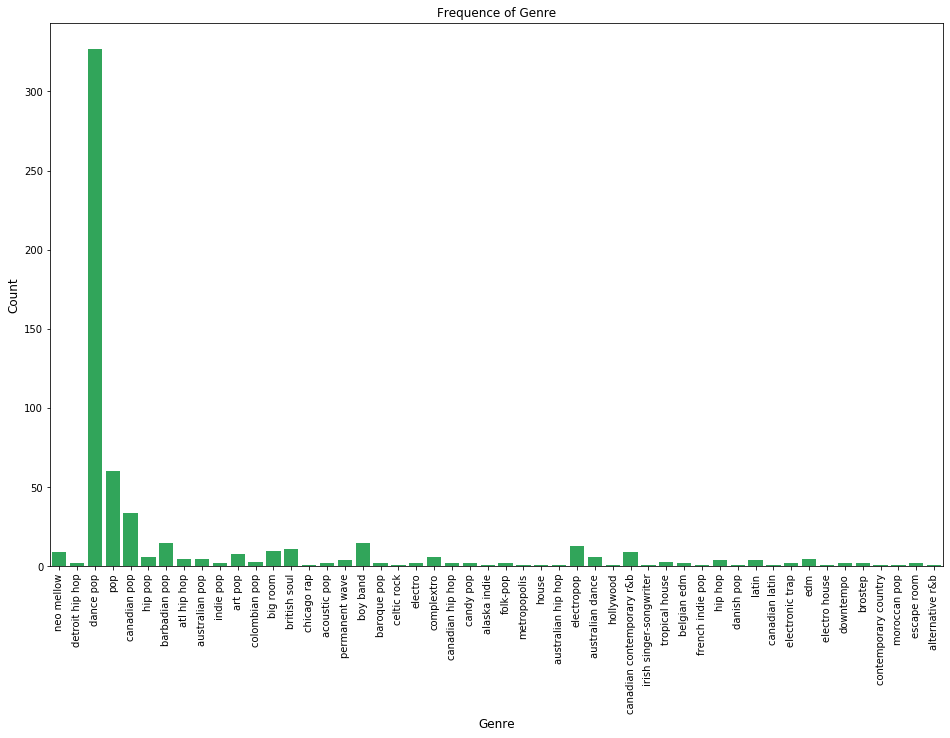

In [69]:
plt.figure(figsize = (16, 10)) # create a figure using matplotlib and set the figure size 
sn.countplot(x = "top genre", data = df, color = "#1DB954") # using seaborn to create a countplot, define variables, dataset and color  
plt.ylabel("Count", fontsize = 12) # set title on the y-axis
plt.xlabel("Genre", fontsize = 12) # set title on the x-axis 
plt.xticks(rotation="vertical") # rotate the title for better visualization 
plt.title("Frequence of Genre", fontsize = 12) # set title 
plt.show() # show plot 

## 3.2 Interactive Part 
In this part the user can search for different things within the dataset. 

### 3.2 Regression Analysis 

### 3.3 Machine Learning 

## 4. Concluding Remarks 

# 5. Appendix
